# Microlensing Detections of Dark Lenses



In [30]:
import numpy as np
from os import path
from astropy.table import Table, Column
import astropy.units as u 
from astropy.coordinates import SkyCoord, Galactocentric
from matplotlib import pyplot as plt
from mw_plot import MWSkyMap, MWFaceOn

# Configuration
data_dir = './data/'

Data on dark lens detections compiled from:

[Kaczmarek et al. (2022), MNRAS, 514, 4845](https://ui.adsabs.harvard.edu/abs/2022MNRAS.514.4845K/abstract)

[Sahu et al. (2017), Science, 356, 1046](https://ui.adsabs.harvard.edu/abs/2017Sci...356.1046S/abstract)

[Kruszyńska et al. (2022), A&A, 662, A59](https://ui.adsabs.harvard.edu/abs/2022A%26A...662A..59K/abstract)

[Jabłońska et al. (2022), A&A, 666, L16](https://ui.adsabs.harvard.edu/abs/2022A%26A...666L..16J/abstract)

[McGill et al. (2023), MNRAS, 520, 259](https://ui.adsabs.harvard.edu/abs/2023MNRAS.520..259M/abstract)

[Lam & Lu (2023), AJ, 955, 116](https://ui.adsabs.harvard.edu/abs/2023ApJ...955..116L/abstract)

[Wyrzkowski & Mandel (2020) A&A, 636, 20](https://ui.adsabs.harvard.edu/abs/2020A%26A...636A..20W/abstract)  Vizier catalog [J/MNRAS/458/3012](https://vizier.cds.unistra.fr/viz-bin/VizieR-4)

[Kruszyńska et al. (2024), A&A, 692, A28](https://ui.adsabs.harvard.edu/abs/2024A%26A...692A..28K/abstract)  Vizier catalog [J/A+A/692/A28](https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/A+A/692/A28&-to=3) (results using Kroupa (2001) mass function used)

In [38]:
# Compiled data on published dark lenses with measured masses and distances
names = [
    'VVV-2013-BLG-0460',
    'VVV-2013-BLG-0324',
    'VVV-2012-BLG-0440',
    'VVV-2013-DSC-0541',
    'Stein 2051 B',
    'Gaia18cbf',
    'GaiaDR3-ULENS-001',
    'LAWD 37',
    'OGLE-2011-BLG-0462/MOA-2011-BLG-191',
    'OGLE3-ULENS-PAR-02',
    'OGLE3-ULENS-PAR-03',
    'OGLE3-ULENS-PAR-04',
    'OGLE3-ULENS-PAR-05',
    'OGLE3-ULENS-PAR-07',
    'OGLE3-ULENS-PAR-09',
    'OGLE3-ULENS-PAR-12',
    'OGLE3-ULENS-PAR-13',
    'OGLE3-ULENS-PAR-15',
    'OGLE3-ULENS-PAR-16',
    'OGLE3-ULENS-PAR-19',
    'OGLE3-ULENS-PAR-22',
    'OGLE3-ULENS-PAR-24',
    'OGLE3-ULENS-PAR-27',
    'OGLE3-ULENS-PAR-28',
    'OGLE3-ULENS-PAR-30',
    'OGLE3-ULENS-PAR-33',
    'OGLE3-ULENS-PAR-34',
    'OGLE3-ULENS-PAR-38',
    'OGLE3-ULENS-PAR-39',
    'OGLE3-ULENS-PAR-42',
    'OGLE3-ULENS-PAR-44',
    'OGLE3-ULENS-PAR-47',
    'OGLE3-ULENS-PAR-48',
    'GaiaDR3-ULENS-025-G2-',
    'GaiaDR3-ULENS-035-G-',
    'GaiaDR3-ULENS-069-G+',
    'GaiaDR3-ULENS-073-G-',
    'GaiaDR3-ULENS-088-G-',
    'GaiaDR3-ULENS-089-G-',  
    'GaiaDR3-ULENS-097-G-',     
    'GaiaDR3-ULENS-118-G-',    
    'GaiaDR3-ULENS-142-G2+',    
    'GaiaDR3-ULENS-155-G+',    
    'GaiaDR3-ULENS-270-G+',  
    'GaiaDR3-ULENS-343-G+',  
    'GaiaDR3-ULENS-353-G+',  
    'GaiaDR3-ULENS-363-G-',  
]
objtype = [
    'NS',
    'NS',
    'U',
    'U',
    'WD',
    'NS',
    'WD',
    'WD',
    'BH',
    'C', # Candidate
    'C', # Candidate,
    'C', # Candidate
    'C', # Candidate
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C', 
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
    'C',
]
ra = [
    269.9306299,
    267.6871261,
    262.0432834,
    193.5259103,
    67.812517,
    241.161917,
    184.4362,
    176.428821,
    267.9174583,
    269.34640,
    272.00177,
    266.60697,
    266.64771, 
    268.99768, 
    268.54924, 
    265.74490, 
    263.98312, 
    269.61305, 
    268.72936, 
    267.95375, 
    270.08460, 
    272.30801, 
    271.19047, 
    271.92272, 
    269.93460, 
    271.01677, 
    267.91233, 
    267.85696, 
    268.39421, 
    269.24911,
    267.84153, 
    267.84152, 
    271.78379,
    260.8781000,
    267.9705000, 
    269.0712000, 
    272.4690000, 
    268.1614000, 
    270.4467000, 
    267.5594000, 
    99.4166892, 
    263.5395000, 
    270.3789000, 
    264.4791000, 
    267.8664000, 
    267.6884000, 
    266.9194000,
]
dec = [
    -25.4220515,
    -26.8092714,
    -34.580735,
    -62.1339938,
    58.970472,
    -41.1048306,
    -59.0294,
    -64.84151,
    -29.89064,
    -28.77555,
    -26.65429, 
    -22.86036, 
    -33.77216,
    -29.64132, 
    -31.53276, 
    -34.18701, 
    -27.26726, 
    -27.43357, 
    -31.01126, 
    -29.29803, 
    -32.25313, 
    -27.20350,
    -26.98757, 
    -29.71087, 
    -29.68536, 
    -28.64411, 
    -30.53803, 
    -32.63504, 
    -31.02008, 
	-33.92100, 
    -30.68366, 
    -30.68367, 
    -29.65945, 
    -27.3788000,
    -34.9749000,
    -32.4500000, 
    -30.0406000, 
    -32.4896000, 
    -26.5331000,
    -23.6717000, 
    13.9551113, 
    -24.8825000, 
    -32.6859000, 
    -28.5589000, 
    -33.1352000, 
    -34.2448000, 
    -25.0204000,
]
# Units of Msun
ML = [
    1.63,
    1.46,
    0.73,
    2.07,
    0.675,
    2.65,
    1.00,
    0.56,
    6.0,
    11.9,
    2.4,
    2.9, # or 3.2
    6.7,
    4.5,
    1.9,
    2.7,
    8.0, # or 9.0
    3.6, # or 2.8
    0.4,
    2.0, # or 2.1
    1.2,
    1.4,
    0.9,# or 1.1
    0.9, # or 0.8
    3.0, # or 2.8
    1.2,
    2.0, # or 2.1
    1.0, # or 1.1
    2.6, # or 2.3
    0.6,
    1.2, # or 0.9 
    0.6,
    1.4, # or 1.3
    0.58,
    0.54,
    3.43,
    6.61,
    4.25,
    0.61,
    0.69, 
    0.21,
    1.87,
    1.58, 
    0.16,
    2.46,
    4.70,
    0.42,
]
# Units of kpc
DL = [
    5.26,
    0.78,
    3.70,
    2.80,
    5.52/1000.0,
    4.4,
    0.90,
    4.6/1000.0,
    1.72,
    1.3,
    0.6,
    0.7,
    1.6,
    1.5,
    0.8,
    0.9,
    1.8, # or 1.9
    1.2, # or 1.3
    1.2,
    4.9, # or 2.8
    1.0,
    2.8,
    1.8, # or 1.2
    2.9, # or 1.7
    1.3, # or 1.2
    2.0,
    2.5, # or 2.6
    1.5, # or 1.7 
    3.6, # or 3.4
    1.8,
    2.7, # or 2.5
    1.8,
    2.1,
    1.04,
    0.82,
    1.55, 
    2.50,
    1.73,
    2.17,
    4.80,
    0.46,
    1.32,
    2.40,
    6.33,
    4.29, 
    0.81,
    1.92,
]

remnants_data = Table([
    Column(name='name', data=names), 
    Column(name='type', data=objtype),
    Column(name='ra', data=ra), 
    Column(name='dec', data=dec), 
    Column(name='ML', data=ML),
    Column(name='DL', data=DL)
])

remnants_data

name,type,ra,dec,ML,DL
str35,str2,float64,float64,float64,float64
VVV-2013-BLG-0460,NS,269.9306299,-25.4220515,1.63,5.26
VVV-2013-BLG-0324,NS,267.6871261,-26.8092714,1.46,0.78
VVV-2012-BLG-0440,U,262.0432834,-34.580735,0.73,3.7
VVV-2013-DSC-0541,U,193.5259103,-62.1339938,2.07,2.8
Stein 2051 B,WD,67.812517,58.970472,0.675,0.00552
Gaia18cbf,NS,241.161917,-41.1048306,2.65,4.4
GaiaDR3-ULENS-001,WD,184.4362,-59.0294,1.0,0.9
LAWD 37,WD,176.428821,-64.84151,0.56,0.0046
OGLE-2011-BLG-0462/MOA-2011-BLG-191,BH,267.9174583,-29.89064,6.0,1.72


## Spatial distributions of compact objects

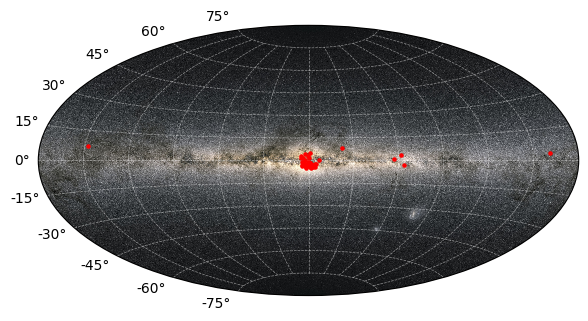

In [32]:
mw1 = MWSkyMap(projection='aitoff', grayscale=False, grid='galactic')
mw1.scatter(remnants_data['ra']*u.deg, remnants_data['dec']*u.deg, c="r", s=5)
plt.tight_layout()
plt.savefig(path.join(data_dir, 'mulens_remnant_sky_map.png'))

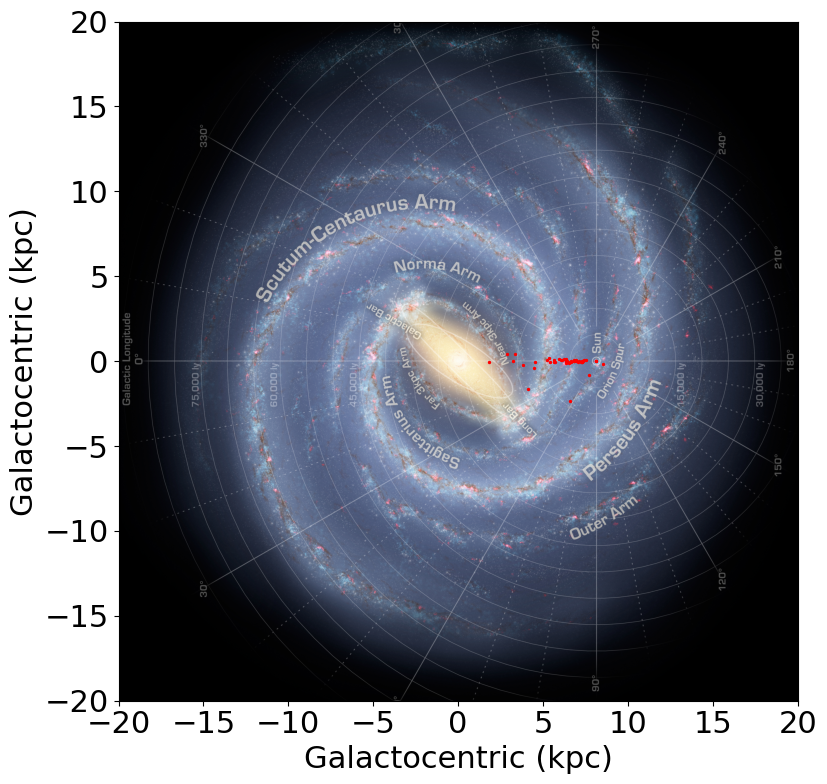

In [37]:
mw2 = MWFaceOn(
    radius=20 * u.kpc,
    unit=u.kpc,
    coord="galactocentric",
    annotation=True,
    figsize=(10, 8),
)

remnants_coords = SkyCoord(
    ra=remnants_data['ra']*u.deg, 
    dec=remnants_data['dec']*u.deg,
    distance=remnants_data['DL']*u.kpc,
    frame='icrs'
)
gc = remnants_coords.transform_to(Galactocentric)

mw2.scatter(abs(gc.x), gc.y, c="r", s=2)
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.savefig(path.join(data_dir, 'mulens_remnants_galaxy.png'))